In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
from math import *
from scipy import integrate

In [67]:
import warnings
warnings.filterwarnings('ignore')

### Задание функций

Гладкая:

$f(x)=x^2$

In [19]:
f_smooth = lambda x: x*x

Разрывная:

$f(x)=\left\{\begin{matrix}
1,&x > 0\\
-1,&x <= 0 
\end{matrix}\right.$

In [34]:
def f_dis(x):
    return int((x > 0)) - int((x <= 0))

Осциллирующая:

$f(x)=e^{x}sin{(100x)}$

In [35]:
f_osc = lambda x: sin(100*x)*exp(x)

###  Интегрирование

#### Метод трапеций

Простая формула

$\int_{a}^{b}f(t)dt \sim \frac{b-a}{2}(f(a)+f(b))$

Состовная формула

$\int_{a}^{b}f(t)dt \sim \sum_{k=0}^{n-1}h\frac{f(x_k)+f(x_{k+1})}{2}$

$h=\frac{b-a}{n}$

Порядок точности

Из доказанного на семинаре имеем:

$|I-\stackrel{-}{I}_k| \leq c*n*h^2=c*\frac{(b-a)^2}{n}$

Тогда

In [36]:
def myIntegrate(f, left, right, n):
    h = np.float32(right - left) / n
    ans = 0
    x_arr = [left]
    f_arr = [f(left)]
    for i in range(n):
        x0 = left + i * h
        x1 = left + (i + 1) * h
        f1 = f(x1)
        f_arr.append(f1)
        x_arr.append(x1)
        ans += (f(x0) + f1) / 2
    ans *= h
    return ans, x_arr, f_arr

In [37]:
def error(int1, int2):
    return abs(abs(int1) - abs(int2))

In [75]:
def graph(f, left, right, text):
    n_arr = np.arange(5, 200)
    err_arr = []
    for n in n_arr:
        i1, x_arr, f_arr = myIntegrate(f, left, right, n)
        er = error(i1, integrate.quad(f, left, right)[0])
        err_arr.append(er)
    plt.figure(figsize=(15,5))
    plt.subplot(122)
    plt.plot(n_arr, err_arr, label='E(N)')
    plt.ylabel('Ошибка')
    plt.xlabel('Число разбиений(N)')
    plt.legend()
    plt.subplot(121)
    plt.plot(x_arr, f_arr, label='f(x)')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.title(text)
    plt.legend()
    plt.show()

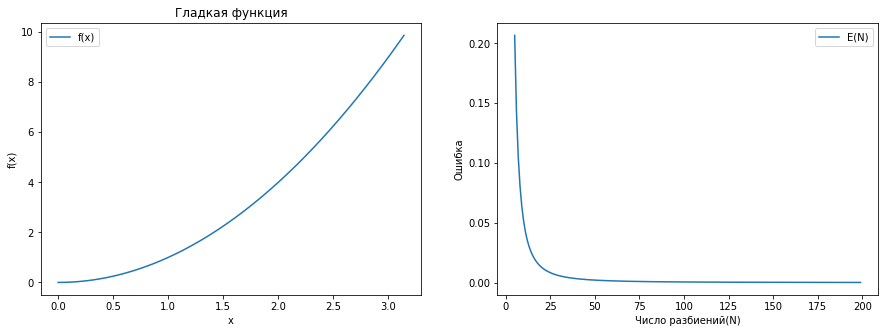

In [76]:
graph(f_smooth, 0, pi, 'Гладкая функция')


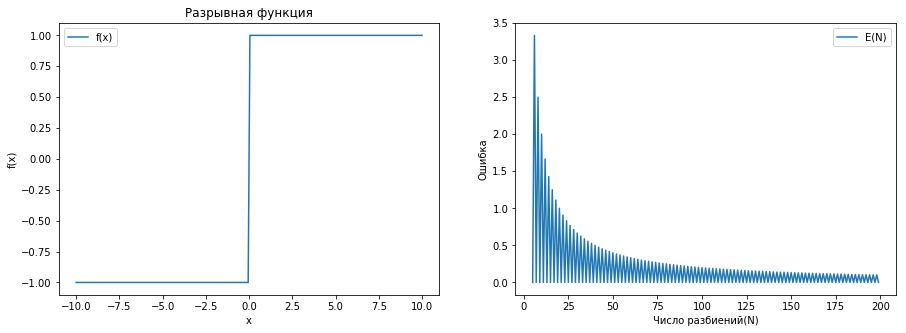

In [77]:
graph(f_dis, -10, 10, 'Разрывная функция')

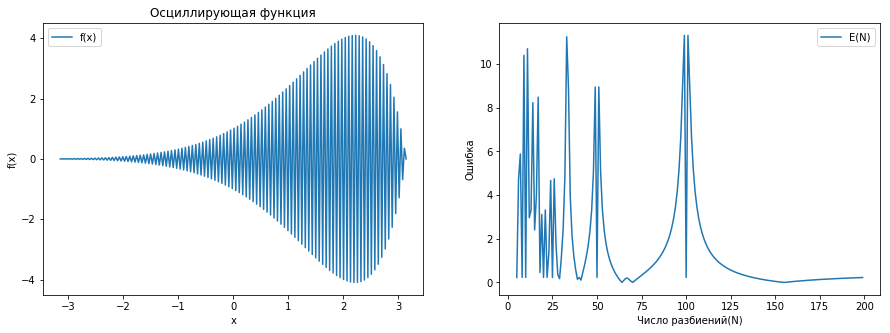

In [78]:
graph(f_osc, -pi, pi, 'Осциллирующая функция')

### Порядок точности

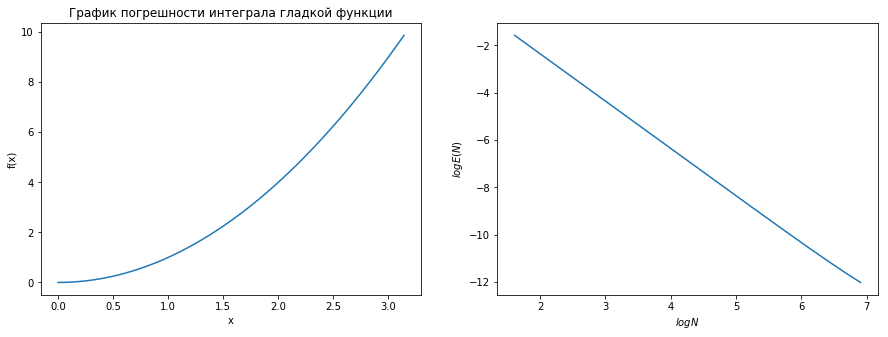

In [84]:
n_arr = np.arange(5, 1000)
err_arr = []
left = 0
right = pi
for n in n_arr:
    i1, x_arr, f_arr = myIntegrate(f_smooth, left, right, n)
    er = error(i1, integrate.quad(f_smooth, left, right)[0])
    err_arr.append(er)
plt.figure(figsize=(15,5))
plt.subplot(122)
plt.plot(np.log(n_arr), np.log(err_arr))
plt.ylabel('$log{E(N)}$')
plt.xlabel('$log{N}$')
plt.subplot(121)
plt.plot(x_arr, f_arr)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('График погрешности интеграла гладкой функции')
plt.show()

Получается экспериментально выявлено, что 

$|I-\stackrel{-}{I}_k| \leq c*n*h^2=c*\frac{(b-a)^2}{n}$

соответсвует действительности